# **Sale Price Correlation Study**

## Objectives

1. Answer business requirement 1:
    * *The client is interested in discovering how the house attributes correlate with the sale price. Therefore, the client expects data visualizations of the correlated variables against the sale price to show that.*
    * In this notebook, we will perform a correlation study and plot graphs to represent our findings


2. Attempt to validate our hypotheses:
    * As laid out in the corresponding REAME.md, our correltation sudy can be used to test our project hypotheses

## Inputs

* inputs/datasets/unzipped/house_prices_records.csv 

## Outputs

* In this notebook we will generate code and graphs to answer buiness requiremnt 1, test our hypotheses and use in our Streamlit App


## CRISP-DM
* Data Understanding

---

# Change working directory

* The notebooks are stored in a sub folder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/milestone-project-heritage-housing-issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")    

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/milestone-project-heritage-housing-issues'

# Load Data

In [4]:
import pandas as pd
df = pd.read_csv(f"inputs/datasets/unzipped/house_prices_records.csv")
print(df.shape)
df.head()

(1460, 24)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1460 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1346 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1298 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

* We will run a profile report in order to get a more detailed look at our data

In [6]:
from pandas_profiling import ProfileReport

pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---

# Correlation Study

* Before we check the correlation rates of our variables against the Sale Price, we will use One Hot Encoding on our categorical variables.
* In order to use our correlation methods, our categorical variables need to be numbers.  One Hot Encoding will allow us to easily see the original values as they split the categorical variables into new columns and assign them a binary value of '1' or '0'.
* To carry out One Hot Encoding, we first need to handle the missing variable in our categorical columns and as we can see above in our dataset, there are a number of columns with missing data. 
* Let's check which columns with missing data below:

In [7]:
vars_with_missing_data = df[df.columns[df.isna().sum() > 0]]
vars_with_missing_data

,2ndFlrSF,BedroomAbvGr,BsmtFinType1,EnclosedPorch,GarageFinish,GarageYrBlt,LotFrontage,MasVnrArea,WoodDeckSF
0,854.0,3.0,GLQ,0.0,RFn,2003.0,65.0,196.0,0.0
1,0.0,3.0,ALQ,NaN,RFn,1976.0,80.0,0.0,NaN
2,866.0,3.0,GLQ,0.0,RFn,2001.0,68.0,162.0,NaN
3,NaN,NaN,ALQ,NaN,Unf,1998.0,60.0,0.0,NaN
4,NaN,4.0,GLQ,0.0,RFn,2000.0,84.0,350.0,NaN
...,...,...,...,...,...,...,...,...,...
1455,694.0,3.0,Unf,NaN,RFn,1999.0,62.0,0.0,0.0
1456,0.0,NaN,ALQ,NaN,Unf,1978.0,85.0,119.0,NaN
1457,1152.0,4.0,GLQ,NaN,RFn,1941.0,66.0,0.0,NaN
1458,0.0,2.0,NaN,112.0,Unf,1950.0,68.0,0.0,NaN


* We will take a list of the categorical variables from this DataFrame to use with our One Hot Encoder and will impute the most frequent value for any missing values for each column.

In [8]:
cat_vars_with_na = (vars_with_missing_data
                    .columns[vars_with_missing_data.dtypes == 'object']
                    .to_list())
cat_vars_with_na

['BsmtFinType1', 'GarageFinish']

* We impute the missing values with CategoricalImputer

In [9]:
from feature_engine.imputation import CategoricalImputer
categorical_imputer = CategoricalImputer(imputation_method='frequent',
                                         variables=cat_vars_with_na)
df = categorical_imputer.fit_transform(df)

* Let's check our DataSet to ensure there is no missing values for ['BsmtFinType1', 'GarageFinish']

In [10]:
df.filter(cat_vars_with_na).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BsmtFinType1  1460 non-null   object
 1   GarageFinish  1460 non-null   object
dtypes: object(2)
memory usage: 22.9+ KB


* We use OneHotEncoder and declare a new DataFrame with our new columns

In [11]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=cat_vars_with_na, drop_last=False)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head(3)

(1460, 33)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,...,BsmtFinType1_ALQ,BsmtFinType1_Unf,BsmtFinType1_Rec,BsmtFinType1_BLQ,BsmtFinType1_None,BsmtFinType1_LwQ,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Fin,GarageFinish_None
0,856,854.0,3.0,No,706,150,0.0,548,2003.0,1710,...,0,0,0,0,0,0,1,0,0,0
1,1262,0.0,3.0,Gd,978,284,NaN,460,1976.0,1262,...,1,0,0,0,0,0,1,0,0,0
2,920,866.0,3.0,Mn,486,434,0.0,608,2001.0,1786,...,0,0,0,0,0,0,1,0,0,0


---

* We will use both person and spearman methods to check the levels of correlation between variables and 'SalePrice'. We will exclude 'SalePrice' from our results and check the 5 most highly correlated varibales for each method.

In [12]:
df_pearson = (df_ohe.corr(method='pearson')['SalePrice']
             .sort_values(key=abs, ascending=False)[1:].head(5))
df_pearson

OverallQual    0.790982
GrLivArea      0.708624
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
Name: SalePrice, dtype: float64

In [13]:
df_spearman = (df_ohe.corr(method='spearman')['SalePrice']
              .sort_values(key=abs, ascending=False)[1:].head(5))
df_spearman

OverallQual    0.809829
GrLivArea      0.731310
YearBuilt      0.652682
GarageArea     0.649379
TotalBsmtSF    0.602725
Name: SalePrice, dtype: float64

* The methods produce similar enough results.
* 'OverallQual' is the most highly correlated variable in each case and only 'YearBuilt' & '1stFlrSF' do not show up in each
* Let's list out the variables to study in a set to remove any duplicates

In [14]:
cols_to_study = set(df_spearman.index.to_list()+df_pearson.index.to_list())
cols_to_study

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

* We create a new DataFrame with the variables most closely correlated with Sales Price

In [15]:
df_eda = df_ohe.filter(['1stFlrSF', 'GarageArea', 'GrLivArea', 'OverallQual',
                        'TotalBsmtSF', 'YearBuilt', 'SalePrice'])
df_eda.head()

,1stFlrSF,GarageArea,GrLivArea,OverallQual,TotalBsmtSF,YearBuilt,SalePrice
0,856,548,1710,7,856,2003,208500
1,1262,460,1262,6,1262,1976,181500
2,920,608,1786,7,920,2001,223500
3,961,642,1717,7,756,1915,140000
4,1145,836,2198,8,1145,2000,250000


# Data Visualisation
* We now want to plot out our data in order to show how these variables correlate to Sales Prices.
* 'SalePrice' as a variable has a large range of values

In [16]:
min_val = int(df_eda.filter(['SalePrice']).min())
max_val = int(df_eda.filter(['SalePrice']).max())
count = df_eda.shape[0]

print(f"There are {count} values in the SalePrice column ranging from" +
      " {min_val} to {max_val}")

There are 1460 values in the SalePrice column ranging from {min_val} to {max_val}


* For this reason, to simplify the visiualisation of our Sale Prices, we will seperate the values into 6 quantiles which will represent ranges of values and display more clearly on histograms.
* We will do so using EqualFrequencyDiscretiser.
* We fit and transform our data below:


In [17]:
from feature_engine.discretisation import EqualFrequencyDiscretiser
discretiser = EqualFrequencyDiscretiser(q=6, variables=['SalePrice'])
discretiser.fit(df_eda)
df_eda = discretiser.transform(df_eda)
df_eda

,1stFlrSF,GarageArea,GrLivArea,OverallQual,TotalBsmtSF,YearBuilt,SalePrice
0,856,548,1710,7,856,2003,4
1,1262,460,1262,6,1262,1976,3
2,920,608,1786,7,920,2001,4
3,961,642,1717,7,756,1915,2
4,1145,836,2198,8,1145,2000,5
...,...,...,...,...,...,...,...
1455,953,460,1647,6,953,1999,3
1456,2073,500,2073,6,1542,1978,4
1457,1188,252,2340,7,1152,1941,5
1458,1078,240,1078,5,1078,1950,2


* We confirm our 'SalePrice' variable has been split up into equal quantiles

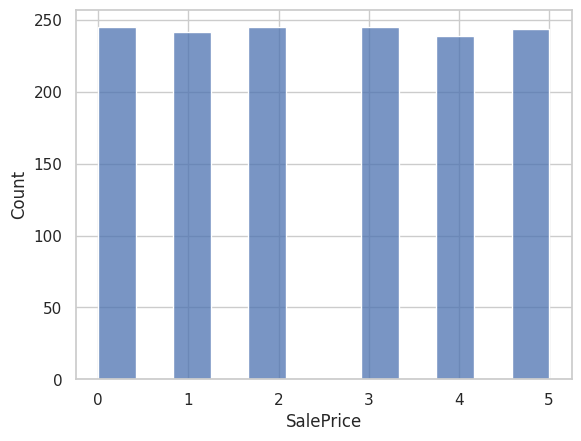

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style="whitegrid")


sns.histplot(data=df_eda, x='SalePrice')
plt.show()

* This has worked, however it is not clear what range the values of 0 - 5 represent.
* We will check how the range of values has been discretised

In [19]:
discretiser.binner_dict_

{'SalePrice': [-inf,
  118500.0,
  139700.0,
  163000.0,
  190000.0,
  241416.66666666663,
  inf]}

* We will assign these ranges to the values they represent in a dictionary

In [20]:
labels = discretiser.binner_dict_['SalePrice']
q_value = len(labels)-1
labels_map = {}

for x in range(0, q_value):
    if x == 0:
        labels_map[x] = f"< {int(labels[1])}"
    elif x < q_value - 1:
        labels_map[x] = f"{int(labels[x])} - {int(labels[x+1])}"
    else:
        labels_map[x] = f"{int(labels[x])} +"

labels_map

{0: '< 118500',
 1: '118500 - 139700',
 2: '139700 - 163000',
 3: '163000 - 190000',
 4: '190000 - 241416',
 5: '241416 +'}

* We apply these values to our DataFrame

In [21]:
df_eda["SalePrice"] = df_eda["SalePrice"].replace(labels_map)
df_eda

,1stFlrSF,GarageArea,GrLivArea,OverallQual,TotalBsmtSF,YearBuilt,SalePrice
0,856,548,1710,7,856,2003,190000 - 241416
1,1262,460,1262,6,1262,1976,163000 - 190000
2,920,608,1786,7,920,2001,190000 - 241416
3,961,642,1717,7,756,1915,139700 - 163000
4,1145,836,2198,8,1145,2000,241416 +
...,...,...,...,...,...,...,...
1455,953,460,1647,6,953,1999,163000 - 190000
1456,2073,500,2073,6,1542,1978,190000 - 241416
1457,1188,252,2340,7,1152,1941,241416 +
1458,1078,240,1078,5,1078,1950,139700 - 163000


* We define the hue_order for our histograms

In [22]:
hue_order = labels_map.values()
list(hue_order)

['< 118500',
 '118500 - 139700',
 '139700 - 163000',
 '163000 - 190000',
 '190000 - 241416',
 '241416 +']

* We will plot our correlated variables on histograms below.
    * plot_numerical() function adapted from CI Lesson: *Exploratory Data Analysis > Exploratory Data Analysis Tools > Correlation Unit 2: Analysis*
* We will also plot accompanying lineplots on the original dataset

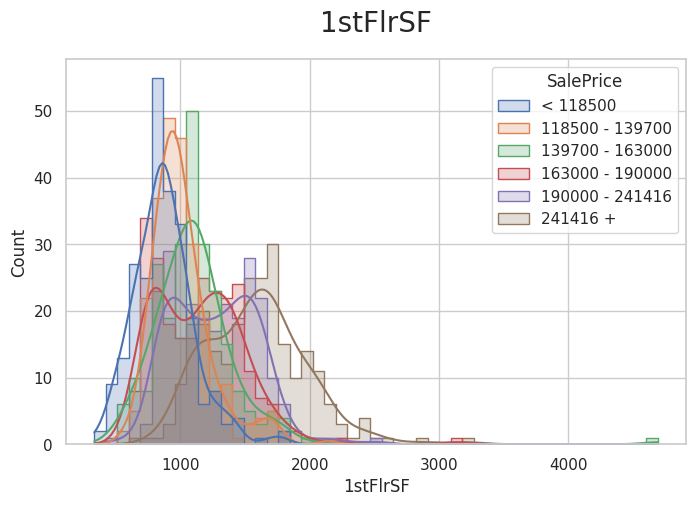

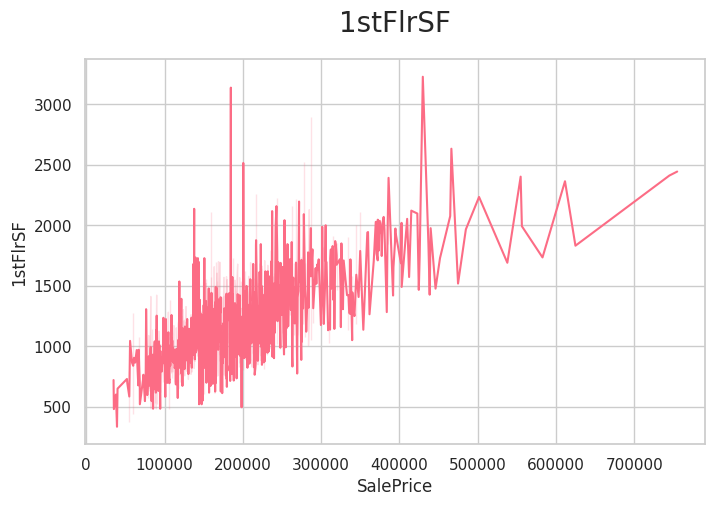

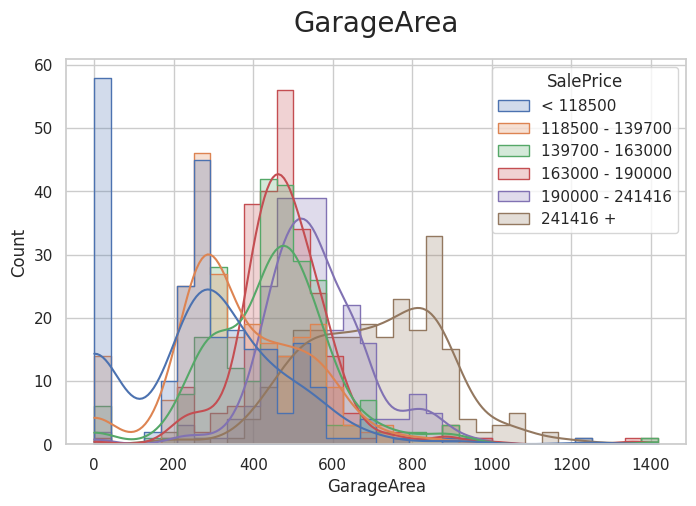

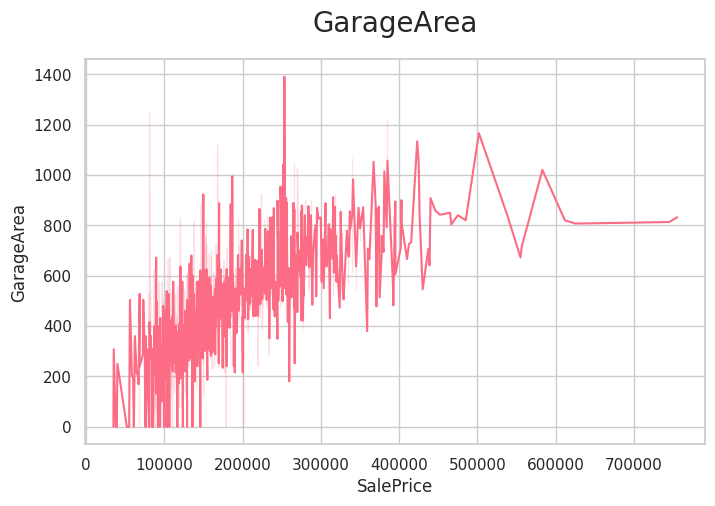

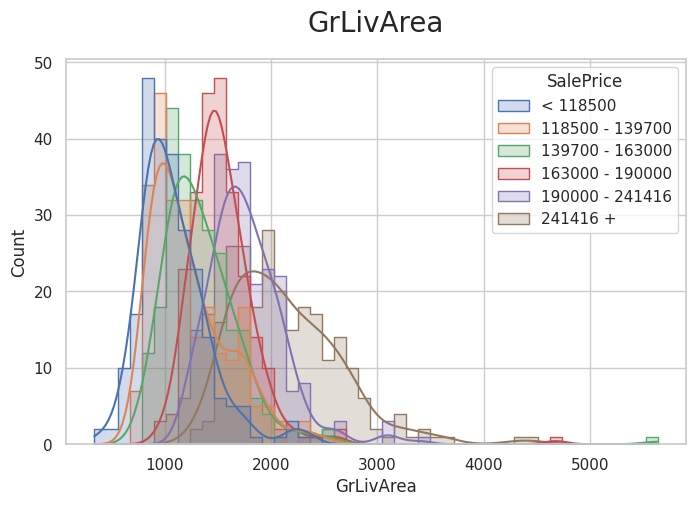

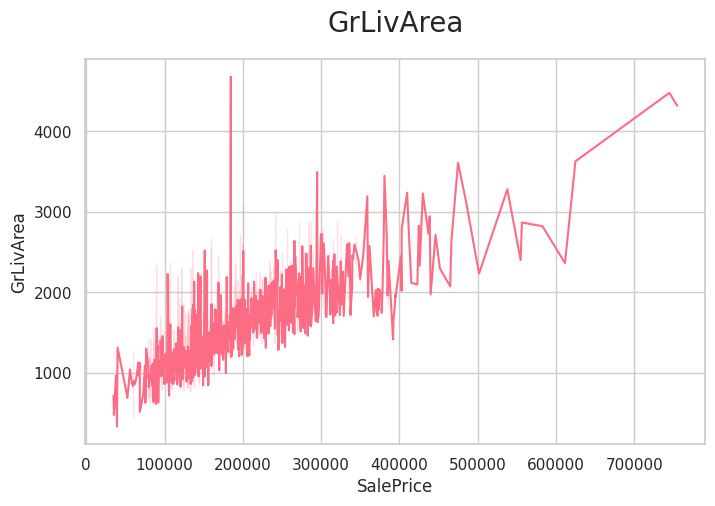

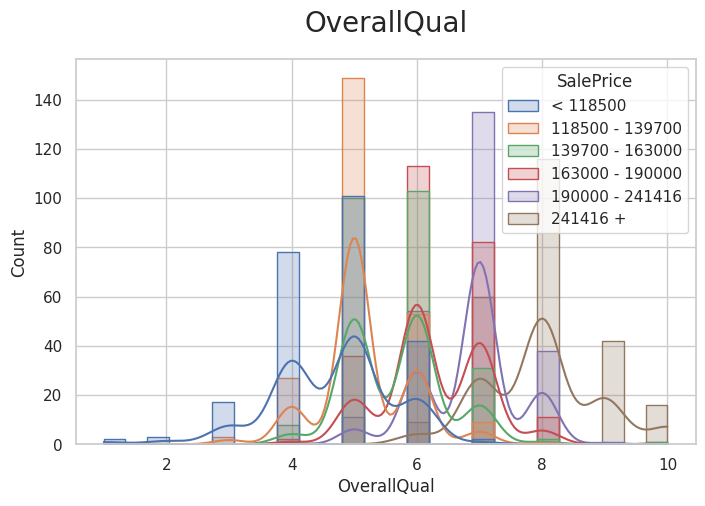

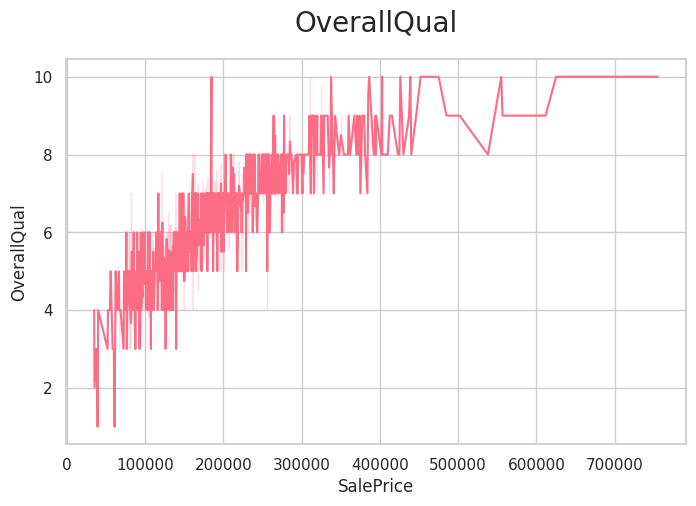

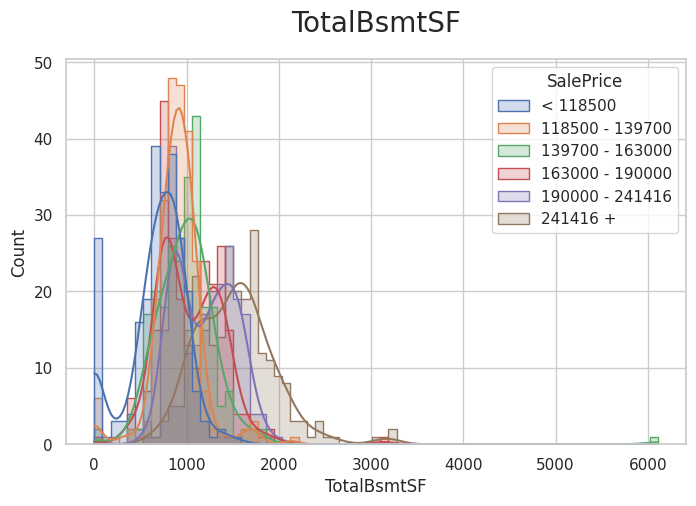

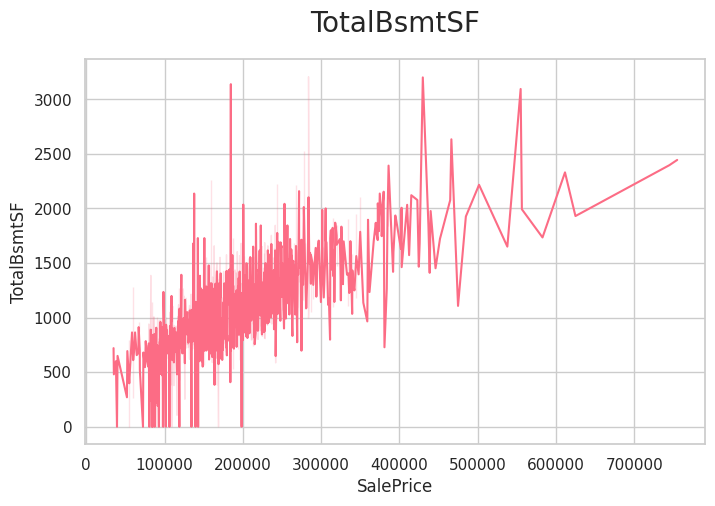

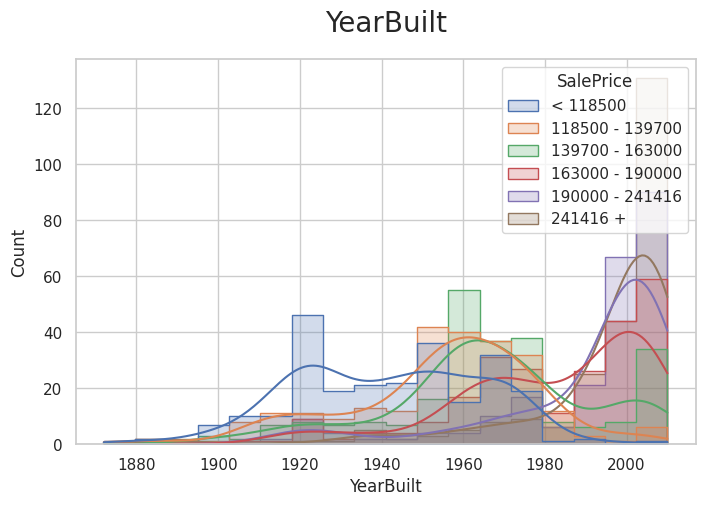

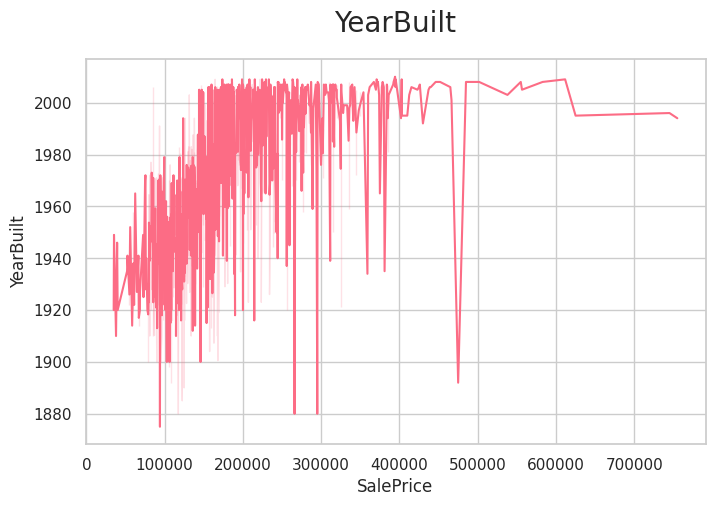

In [23]:
import numpy as np

def plot_numerical(df, col, target_var, hue_order):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue=target_var, hue_order=hue_order, kde=True,
                 element="step")
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


def plot_line(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=df, x=target_var, y=col, color='#FC6C85')
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


target_var = 'SalePrice'
for col in ['1stFlrSF', 'GarageArea', 'GrLivArea', 'OverallQual',
            'TotalBsmtSF', 'YearBuilt']:
    plot_numerical(df_eda, col, target_var, hue_order)
    plot_line(df, col, target_var)
    print("\n\n")


## Conclusions
* Houses with high Sales Prices tend to have first floors with at least 1500 square feet.

* Houses with low Sales Prices tend to have no garage and those with a garage of at least 600 square feet tend to have high Sales Prices.

* Houses with high sales prices tend to have above grade living area of at least 1500 square feet. Those with low sales prices tend to have 1000 square feet or less.

* Houses with high Sales prices tend to have at least a Very Good Overall Quality Rating.

* Houses with high Sales Prices tend to have basements with at a square footage of at least 1200. Houses with no basements or basements with less than 1000 square feet tend to have low Sales prices.

* Houses do not tend to have a high Sales Price if built before 1990.


# Testing our Hypotheses

* Next, as part of Sale Price Study, we will test our hypotheses and will do so using correlation studies:

## **1. Larger houses will tend to have sell at a higher price.**

* We will test this by checking whether properties with higher values for '1stFlrSF' tend to have higher Sales Prices

* If we suspect that properties with greater 1st Floor square footage will generally have a higher sales price, then we could expect a linear correlation between the variables '1stFlrSF' & 'SalePrice'.
* Therefore, we will check the pearson correlation levels between these variables:

In [24]:
df_pearson = df.corr(method='pearson')['SalePrice'].filter(['1stFlrSF'])
df_pearson

1stFlrSF    0.605852
Name: SalePrice, dtype: float64

* As we can see, the level of pearson correlation between the varaibles is 0.61, which is relatively high.
* This does not necessarily confirm that larger properties have higher sales prices, but we can use a scatterplot to visualise the data and gleam a better understanding

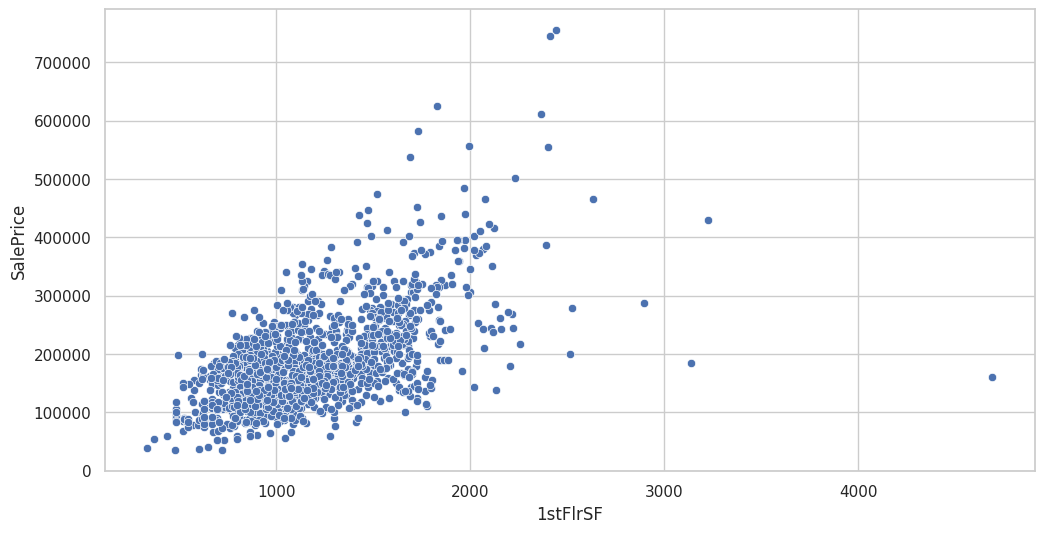

In [25]:
x, y = '1stFlrSF', 'SalePrice'
fig, axes = plt.subplots(figsize=(12, 6))
sns.scatterplot(data=df, x=x, y=y)
plt.show()

* We can see there is a general trend in higher SalePrice values when there is higher 1st Floor Square Footage.
* It is not hugely pronounced, hwoever, we can note that there are no houses worth less than $100,000 where the '1stFlrSF' value is higher than 1500.
* We can also examine the y-axis and note that there are no Sale Prices greater than $300,000 where the '1stFlrSF' value is less than 1000.
* If we examine our histogram from our previous study, we can see that houses in the higher range of Sale Prices tend to have at least 1500 first floor square footage

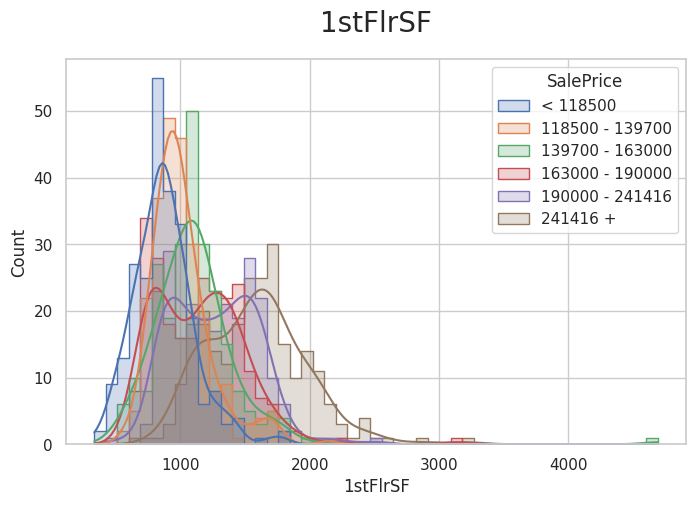

In [26]:
plot_numerical(df_eda, '1stFlrSF', 'SalePrice', hue_order)

* Our correlation sutdy and visualisations support our hypothesis

## **2. The overall condition of the house will result in a higher sale price.**
* We will check how OverallCond ratings correlated to SalePrice and also check whether homes with similar values for '1stFlrSF', with greater OverallCond, tend to have greater Sale prices.

* Similar to our first hypothesis, we should suspect a that the OverallCond might correlate linearly with the SalePrice if a higher rating is to result in a higher Sale price.
* We will check the level of pearson correlation bewteen the variables.

In [27]:
df_pearson = df.corr(method='pearson')['SalePrice'].filter(['OverallCond'])
df_pearson

OverallCond   -0.077856
Name: SalePrice, dtype: float64

* The level of linear correlation between the 'OverallCond' & 'SalePrice' is 0.08, which is very low and does not suggest that the overall condition rating is a strong factor in the Sale Price.
* This does not support our hypothesis, however, there are numerous variables which affect the Sale Price, so it may be the case that the Overall Condiiton rating of a house may play a larger role when taking houses of similar size into account. This forms part of our hypothesis, so we will try and validate this.
* To do so, we willneed to group houses of similar 1st floor square footage together, so we will discretize the column values and convert the variable to a categorical variable.
* We will use EqualFrequencyDiscretiser to do so but also Outlier Trimmer in order to have more accurate ranges of '1stFlrSF'.

#### Outlier Trimmer

In [28]:
from feature_engine.outliers import OutlierTrimmer
df_hyp = df.copy()
outlier_trimmer = OutlierTrimmer(capping_method='iqr', fold=1.5, tail='both',
                                 variables=['1stFlrSF'])
df_hyp = outlier_trimmer.fit_transform(df_hyp)

#### Discretisation

In [29]:
discretiser = EqualFrequencyDiscretiser(q=6, variables=['1stFlrSF'])
discretiser.fit(df_hyp)
df_hyp = discretiser.transform(df_hyp)
df_hyp.filter(['1stFlrSF']).head(5)

,1stFlrSF
0,1
1,4
2,1
3,2
4,3


* Confirm the range of values has been split into 4 categories with equal counts

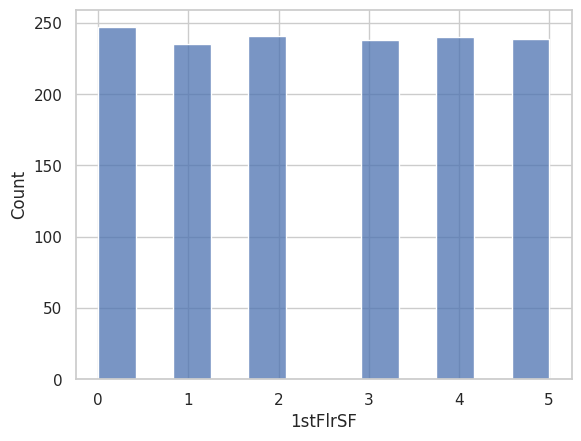

In [30]:
sns.histplot(data=df_hyp, x='1stFlrSF')
plt.show()

* We check how the range of values has been discretised

In [31]:
discretiser.binner_dict_

{'1stFlrSF': [-inf, 816.0, 944.0, 1080.0, 1253.0, 1516.0, inf]}

* We assign these ranges to the values which they represent

In [32]:
labels = discretiser.binner_dict_['1stFlrSF']
q_value = len(labels)-1
labels_map = {}

for x in range(0, q_value):
    if x == 0:
        labels_map[x] = f"< {int(labels[1])}"
    elif x < q_value - 1:
        labels_map[x] = f"{int(labels[x])} - {int(labels[x+1])}"
    else:
        labels_map[x] = f"{int(labels[x])} +"

labels_map

{0: '< 816',
 1: '816 - 944',
 2: '944 - 1080',
 3: '1080 - 1253',
 4: '1253 - 1516',
 5: '1516 +'}

* We apply these to df_hyp

In [33]:
df_hyp['1stFlrSF'] = df_hyp['1stFlrSF'].replace(labels_map)
df_hyp.head(5)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,816 - 944,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1253 - 1516,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,816 - 944,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,944 - 1080,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1080 - 1253,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


In [34]:
order = labels_map.values()
list(order)

['< 816', '816 - 944', '944 - 1080', '1080 - 1253', '1253 - 1516', '1516 +']

* We will now visualise '1stFlrSF' against 'SalePrice' and use a hue to represent the 'OverallCond' ratings.

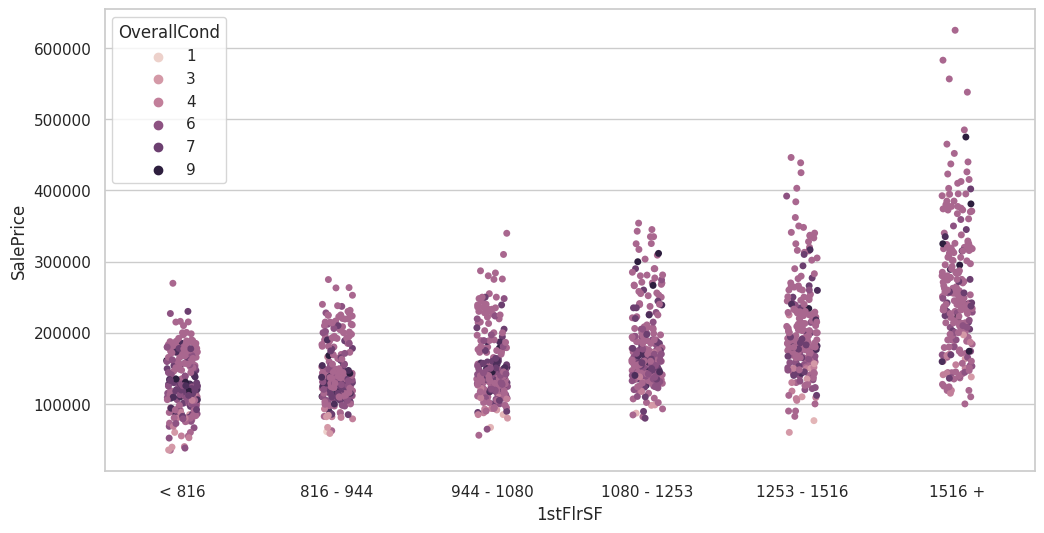

In [35]:
x, y = '1stFlrSF', 'SalePrice'
fig, axes = plt.subplots(figsize=(12, 6))
sns.stripplot(data=df_hyp, x=x, y=y, hue='OverallCond', order=order)
plt.show()

* From looking at our strip plot, we can see that generally the most frequent rating for the most expensive properties for each '1stFlrSF' range is 5, which is not completely surprising as it is the most frequent rating in our dataset.
* We can also see that any property rated 2 or below tend to be towards the bottom in terms of Sale price.
* It is not totally clear from our plot, that a higher rating will translate to a higher Sale Price for similarly sized properties:
    * Some 9 rated properties can be seen at the top of some ranges but looking at 1516+ for example, there are properties rated 9 which are towards the bottom.
    * If we look throughout each range and only take ratings of 7+ into account, they seem to be spread accross the range of Sale Prices for each quantile of 1t floor square foot.
* With these arguments and the low level of correlation studied earlier, our correlation study does not validate our hypothesis, but rather contradicts it.

## **3. Houses with Garages will tend to have a higher sales price than those without and those with large garages will tend to sell at higher prices.**

* We again will test this hypothesis using a correlation study and visualisations.
* We would again suspect that the GarageArea might correlate linearly with the SalePrice if a larger garage is to result in a higher Sale price.
* We will check the level of pearson correlation bewteen the variables.

In [36]:
df_pearson = df.corr(method='pearson')['SalePrice'].filter(['GarageArea'])
df_pearson

GarageArea    0.623431
Name: SalePrice, dtype: float64

* This is a relatively high score. It appears that the size of the Garage will likely lead to a higher sales price.
* We will plot the data out and check that it confirms this idea.
* We can use the plot from our previous correlation study and inspect.

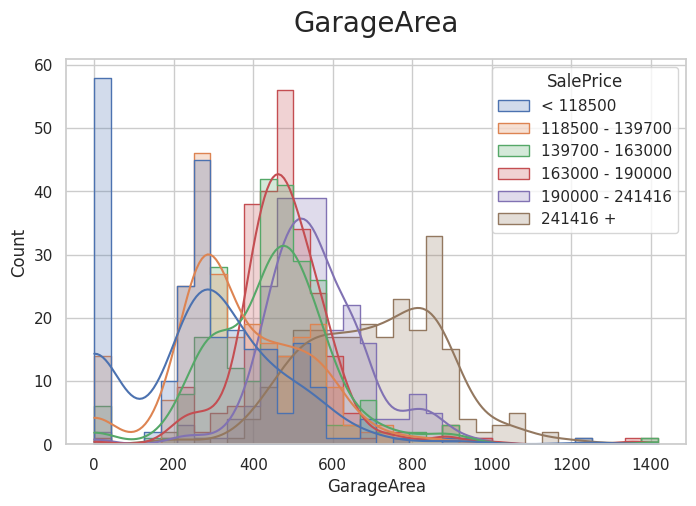

In [37]:
plot_numerical(df_eda, 'GarageArea', 'SalePrice', hue_order)

* It seems clear from our histogram that the trend of larger garages results in a higher sale price. 
    * The higher range of Sale Prices are concentrated in the higher end of the scale when it comes to Garage Area and apart from a few outliers, almost all properties with the largest garages have high sale prices.


* It is also clear from the high number of properties with sale prices of less than $118,500, that properties without garages ('GarageArea'=0) will tend to have a lower sale price than those that do.
    * There are come properties sold without garages in the higher range of sale prices, but these are a minority.
    * It can also be seen, that outside of properties with no garage, the bulk of properties with sale prices of less than $118,500, have garages which fall between 200 and 400 square foot.

* Our correlation study in this case validates our hypothesis.

---

# Next Steps

* We have completed our first business requirment and generated content for our dashboard.
* The next action is to move on to business requirment 2 and build an ML pipeline to predict the sale price of the inherited homes and any other homes in Ames, Iowa.
* There are no files to push to repo from this notebook.